# Определение перспективного тарифа для телеком компании

## Описание проекта
    «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    Надо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
    Описание тарифов:
**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей
**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

    «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## 1. Импорт  и первичный анализ данных

In [1]:
# Загрузка библиотек
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
calls = pd.read_csv('calls.csv', sep=',' , decimal='.')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
internet = pd.read_csv('internet.csv', sep=',' , decimal='.')
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [4]:
messages = pd.read_csv('messages.csv', sep=',' , decimal='.')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [5]:
users = pd.read_csv('users.csv', sep=',' , decimal='.')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [6]:
tariffs = pd.read_csv('tariffs.csv', sep=',' , decimal='.')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Выводы
1. Для возможности операций с датами, надо перевести столбцы с датами в таблицах Интернет, Сообщения, Звонки в тип date и категоризировать его по месяцам.
2. Таблица Интернета модержит столбец 'Unnamed'. Он не нужен, это нумерация записей и его можно удалить.

## 2. Подготовка данных

In [7]:
# Извлечениие месяца из даты в 3 таблицах функциональности (звонки, интернет, сообщения)
def month_from_date (data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d') 
    data[column+'_month'] = pd.DatetimeIndex(data[column]).month # получение месяца
    
month_from_date(calls, 'call_date')
calls['duration'] = np.ceil(calls['duration']) # Округление в большую сторону продолжительности звонка

month_from_date(internet, 'session_date')
internet['mb_used'] = np.ceil(internet['mb_used']) # Округление в большую сторону продолжительности интернет-сессии

month_from_date(messages, 'message_date')

In [8]:
# Удаление ненужного столбца 'Unnamed: 0'
internet.drop('Unnamed: 0', axis='columns', inplace=True) 

In [9]:
# Сводные таблицы
# Количество сделанных звонков и израсходованных минут разговора по месяцам
calls_month = calls.pivot_table(index='user_id',columns='call_date_month',values='duration',aggfunc=['sum', 'count'])
calls_month.columns = ['Jan_calls_sum', 'Feb_calls_sum', 'Mar_calls_sum', 'Apr_calls_sum', 'May_calls_sum',\
                       'Jun_calls_sum', 'Jul_calls_sum', 'Aug_calls_sum', 'Sep_calls_sum', 'Oct_calls_sum',\
                       'Nov_calls_sum', 'Dec_calls_sum', 'Jan_calls_count', 'Feb_calls_count', 'Mar_calls_count',\
                       'Apr_calls_count', 'May_calls_count', 'Jun_calls_count', 'Jul_calls_count', 'Aug_calls_count',\
                       'Sep_calls_count', 'Oct_calls_count', 'Nov_calls_count', 'Dec_calls_count']

# Объем израсходованного интернет-трафика по месяцам
internet_month = internet.pivot_table(index='user_id',columns='session_date_month',values='mb_used',aggfunc=['sum'])
internet_month.columns = ['Jan_mb', 'Feb_mb', 'Mar_mb', 'Apr_mb', 'May_mb', 'Jun_mb', 'Jul_mb', 'Aug_mb', 'Sep_mb',\
                          'Oct_mb', 'Nov_mb', 'Dec_mb']

# Количество отправленных сообщений по месяцам
messages_month = messages.pivot_table(index='user_id', columns='message_date_month', values='id', aggfunc=['count'])
messages_month.columns = ['Jan_messages', 'Feb_messages', 'Mar_messages', 'Apr_messages', 'May_messages', 'Jun_messages',\
                          'Jul_messages', 'Aug_messages', 'Sep_messages', 'Oct_messages', 'Nov_messages', 'Dec_messages']


Не все пользуются услугами. 8 - не звонили, 3 - не пользовались интернетом, 74 - не посылали сообщения

In [10]:
# Соединяем все таблицы в одну 
full = users.merge(calls_month,how='left',on='user_id')
full = full.merge(messages_month,how='left',on='user_id')
full = full.merge(internet_month,how='left',on='user_id')
full = full.merge(tariffs,how='left', left_on = 'tariff', right_on = 'tariff_name')

In [11]:
print(full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                500 non-null    int64  
 1   age                    500 non-null    int64  
 2   churn_date             38 non-null     object 
 3   city                   500 non-null    object 
 4   first_name             500 non-null    object 
 5   last_name              500 non-null    object 
 6   reg_date               500 non-null    object 
 7   tariff                 500 non-null    object 
 8   Jan_calls_sum          43 non-null     float64
 9   Feb_calls_sum          82 non-null     float64
 10  Mar_calls_sum          114 non-null    float64
 11  Apr_calls_sum          165 non-null    float64
 12  May_calls_sum          205 non-null    float64
 13  Jun_calls_sum          244 non-null    float64
 14  Jul_calls_sum          289 non-null    float64
 15  Aug_ca

In [12]:
# Добовляем колонки расходов пользователей по месяцам 
# Функция вычисления расходов в месяц согласно тарифам
def profit_month(row):
        profit = 0
        if row[m + '_calls_sum'] > 0:
            profit = row['rub_monthly_fee']
            if row[m + '_calls_sum'] > row['minutes_included']:
                profit = row['rub_monthly_fee'] + (row[m + '_calls_sum']-row['minutes_included']) * row['rub_per_minute']
            if row[m + '_messages'] > row['messages_included']:
                profit += (row[m + '_messages']-row['messages_included']) * row['rub_per_message']
            if row[m + '_mb'] > row['mb_per_month_included']:
                profit += (row[m + '_mb']-row['mb_per_month_included'])/1024 * row['rub_per_gb']
        return profit
# Префиксы наименований колонок    
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mark = ['_calls_sum', '_calls_count', '_messages', '_mb', '_profit']

# Заполнение колонок расходов
for m in month:
    full[m+'_profit'] = full.reset_index().apply(profit_month, axis=1)
print(full.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                500 non-null    int64  
 1   age                    500 non-null    int64  
 2   churn_date             38 non-null     object 
 3   city                   500 non-null    object 
 4   first_name             500 non-null    object 
 5   last_name              500 non-null    object 
 6   reg_date               500 non-null    object 
 7   tariff                 500 non-null    object 
 8   Jan_calls_sum          43 non-null     float64
 9   Feb_calls_sum          82 non-null     float64
 10  Mar_calls_sum          114 non-null    float64
 11  Apr_calls_sum          165 non-null    float64
 12  May_calls_sum          205 non-null    float64
 13  Jun_calls_sum          244 non-null    float64
 14  Jul_calls_sum          289 non-null    float64
 15  Aug_ca

In [13]:
display(full)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Jan_calls_sum,Feb_calls_sum,...,Mar_profit,Apr_profit,May_profit,Jun_profit,Jul_profit,Aug_profit,Sep_profit,Oct_profit,Nov_profit,Dec_profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,0.000000,0.000000,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1153.906250,550.000000
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,0.000000,0.000000,0.00000,550.000000,987.695312,1524.023438,814.062500,550.000000,1184.765625,1092.382812
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,0.000000,0.000000,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,1950.000000,2299.365234,1950.000000,3158.789062,1950.000000
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,48.0,594.0,...,2601.859375,1733.703125,2186.71875,1653.085938,2560.648438,2232.562500,2817.578125,3060.742188,2936.781250,1661.101562
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,550.000000,550.000000,1579.531250
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,550.000000,2326.234375,1879.296875,1574.218750,0.000000,0.000000


## 3. Анализ данных

### Формируем таблицы статистических характеристик по месяцам

In [14]:
# Формирование таблиц по тарифам
full_smart = full.query("tariff == 'smart'")
full_ultra = full.query("tariff == 'ultra'")

In [15]:
pd.set_option('display.precision', 8)
# Функция вычисления статистических характеристик
def stat(data, mark):
    stat = pd.DataFrame(index = ['variance_estimate','standart_dev', 'mean', 'compare'], columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] )
    for m in month:
        stat.loc['variance_estimate', m] = np.var(data[m+mark], ddof=1)
        stat.loc['standart_dev', m] = np.std(data[m+mark], ddof=1)
        stat.loc['mean', m] = data[m+mark].mean()
    return stat
# Формируем таблицы статистических характеристик по месяцам
stat_calls_smart = stat(full_smart,'_calls_count')
stat_calls_ultra = stat(full_ultra,'_calls_count')
stat_calls_sum_smart = stat(full_smart,'_calls_sum')
stat_calls_sum_ultra = stat(full_ultra,'_calls_sum')
stat_messages_smart = stat(full_smart,'_messages')
stat_messages_ultra = stat(full_ultra,'_messages')
stat_mb_smart = stat(full_smart,'_mb')
stat_mb_ultra = stat(full_ultra,'_mb')
stat_profit_smart = stat(full_smart,'_profit')
stat_profit_ultra = stat(full_ultra,'_profit')
display(stat_calls_smart)
display(stat_calls_ultra)
display(stat_calls_sum_smart)
display(stat_calls_sum_ultra)
display(stat_messages_smart)
display(stat_messages_ultra)
display(stat_mb_smart)
display(stat_mb_ultra)
display(stat_profit_smart)
display(stat_profit_ultra)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,433.13458,644.85814,652.11688,660.7393,643.9843,554.59267,606.61975,622.66755,613.51555,629.74933,604.9629,707.27331
standart_dev,20.811886,25.394057,25.536579,25.70485,25.376846,23.549791,24.629652,24.953307,24.769246,25.094807,24.595993,26.594611
mean,27.676471,40.189655,54.324675,51.3125,55.241135,55.889571,56.726368,59.230769,59.776062,60.167235,61.698413,66.684524
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,1733.7778,1678.6938,2010.4474,1202.2932,1505.9276,1470.5429,1698.4869,1762.6632,1831.3525,1896.0748,1655.2178,2141.2087
standart_dev,41.638657,40.971866,44.838013,34.6741,38.806283,38.347658,41.212704,41.984083,42.794305,43.543941,40.684368,46.273196
mean,59.444444,41.541667,67.675676,66.509434,75.90625,69.209877,78.363636,74.058252,77.288288,80.652542,78.031008,86.425373
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,23787.341,36412.288,36823.155,34778.207,34820.061,29960.52,32250.27,34177.271,32950.53,34889.53,31100.611,39131.448
standart_dev,154.23145,190.82004,191.8936,186.48916,186.60134,173.09107,179.5836,184.87096,181.52281,186.78739,176.35365,197.8167
mean,203.85294,298.68966,390.05195,367.13393,387.3617,398.06748,408.35323,423.26923,430.26641,427.59044,436.64762,479.98512
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,72769.361,87919.679,111384.9,66036.83,74881.016,86019.652,86952.587,91169.554,98597.904,97140.336,88449.624,107981.03
standart_dev,269.75797,296.51253,333.74377,256.97632,273.64396,293.29107,294.87724,301.94296,314.00303,311.67344,297.40482,328.60467
mean,428.11111,297.125,489.64865,475.30189,534.25,497.46914,564.39773,530.61165,558.88288,581.72881,562.36434,614.92537
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,252.13333,440.46571,669.78048,517.86568,638.77578,731.6358,719.35247,767.21305,702.50555,736.50302,711.36137,832.44711
standart_dev,15.878707,20.987275,25.880117,22.756662,25.274014,27.048767,26.820747,27.698611,26.504821,27.138589,26.671359,28.85216
mean,20,27.94,35.550725,35.864583,39.032787,38.577465,38.988506,38.75,39.219731,39.082677,39.881481,42.264808
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,765.28571,713.39583,1826.6667,1408.2564,1559.5535,1935.673,2190.731,2022.9664,1906.7633,2426.6065,2249.2958,2362.8706
standart_dev,27.663798,26.709471,42.739521,37.526743,39.491183,43.996284,46.805245,44.977399,43.666501,49.260598,47.426742,48.609368
mean,43.428571,32.9375,47.8,44.512821,48.769231,52.313433,62.136986,58.897727,63.294737,69.776699,66.159292,72.008547
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,41626213,39119349,34052595,32547357,35822355,33616415,34861097,30305801,27062146,34417112,28588524,31140833
standart_dev,6451.8379,6254.5463,5835.4601,5705.0291,5985.178,5797.9665,5904.3286,5505.0705,5202.129,5866.61,5346.8238,5580.3972
mean,8524.4412,11611.397,15123.857,13479.482,15825.199,15814.768,15763.512,16703.252,16324.527,16778.565,16917.532,18136.834
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,47226405,1.0989145e+08,1.2016405e+08,94623931,96804911,83149196,97836548,1.0731229e+08,87648043,93713137,96091502,1.0519434e+08
standart_dev,6872.147,10482.912,10961.936,9727.4833,9838.9487,9118.6181,9891.2359,10359.164,9362.0534,9680.5546,9802.6273,10256.429
mean,13153.556,12858.5,17551.973,16843.8,19674.848,19170.458,20742.589,19778.915,19390.825,20228.328,19954.226,21971.659
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,59268.252,132392.99,310166.21,268893.22,505999.9,566547.15,619417.62,737428.79,640546.62,786834.53,682003.1,1083165.6
standart_dev,243.45072,363.85848,556.92568,518.54915,711.3367,752.69326,787.03089,858.73674,800.34156,887.03694,825.83479,1040.7524
mean,66.486935,132.9105,245.34317,289.93719,460.72932,535.5586,668.89116,841.01718,885.59324,1089.0252,1152.6255,1443.1422
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
variance_estimate,217266.01,513057.86,763309.57,931441.13,1116249.7,1084357.2,1202767.1,1037343.5,825681.41,818436.14,636417.41,597482.12
standart_dev,466.11802,716.28057,873.6759,965.11198,1056.5272,1041.3247,1096.7074,1018.5006,908.67013,904.6746,797.75774,772.96967
mean,117.78523,304.71896,497.68017,710.39416,884.78332,1106.3296,1235.3942,1420.5691,1486.3239,1632.2223,1801.1099,1907.784
compare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Гистограммы показателей по месяцам

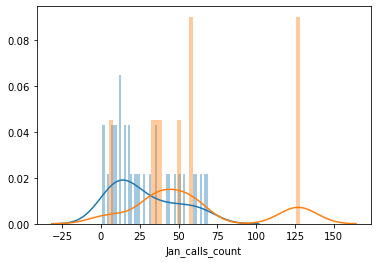

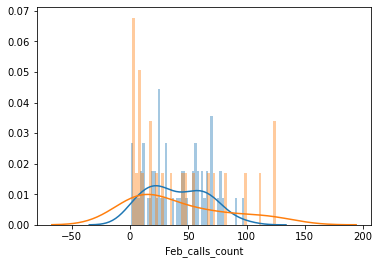

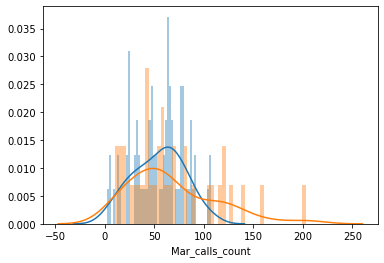

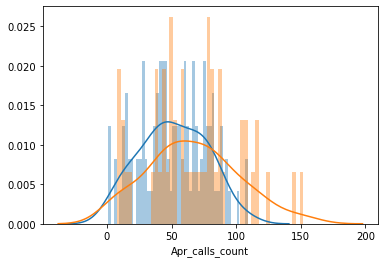

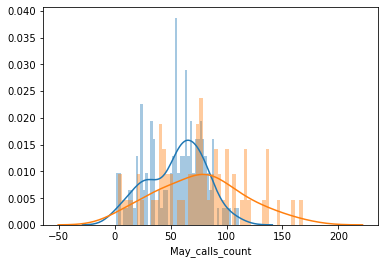

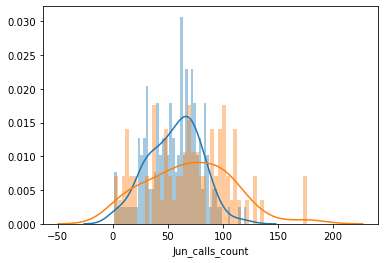

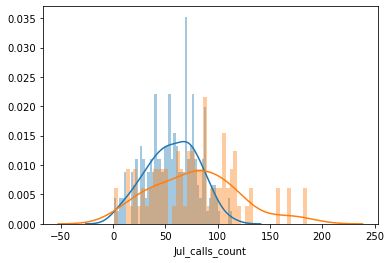

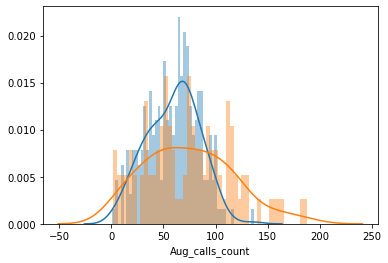

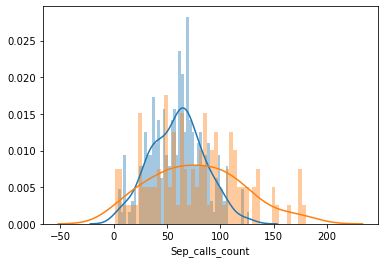

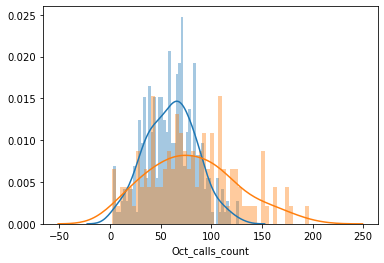

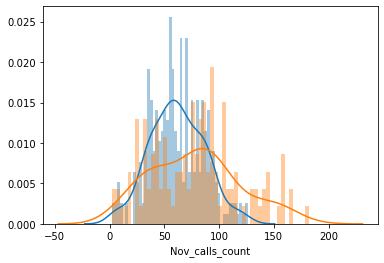

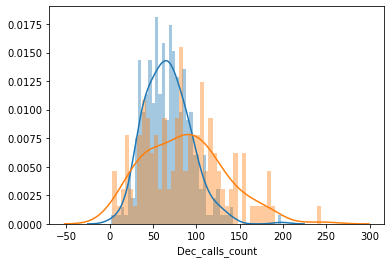

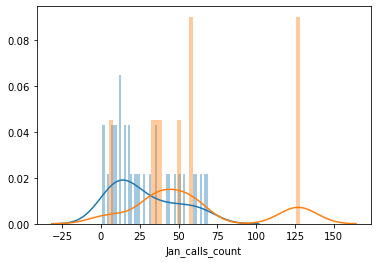

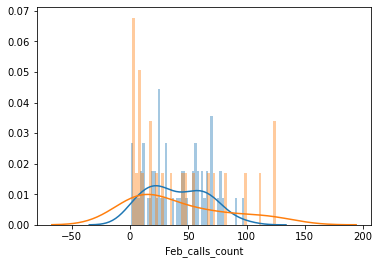

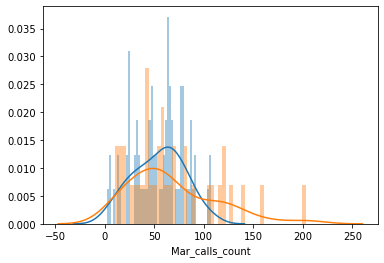

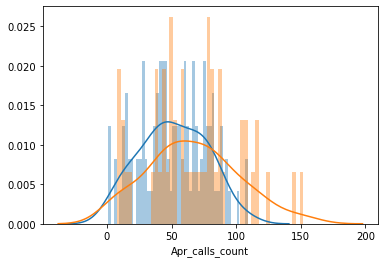

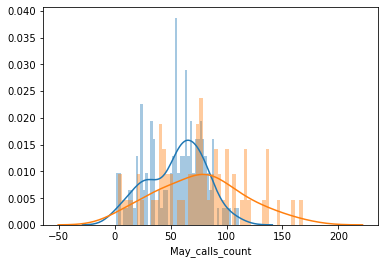

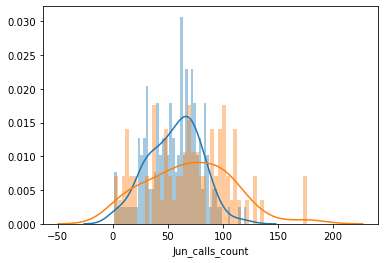

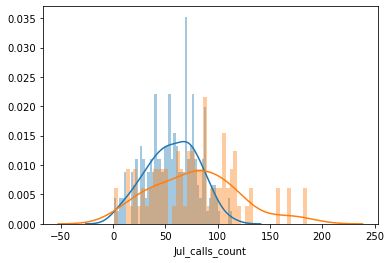

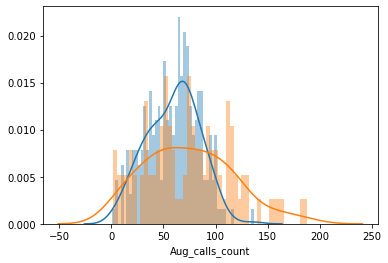

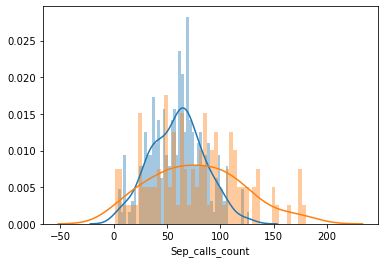

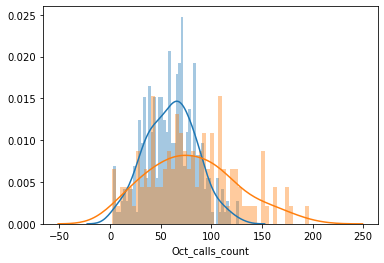

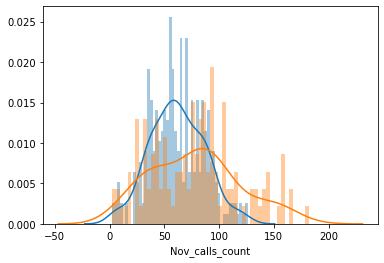

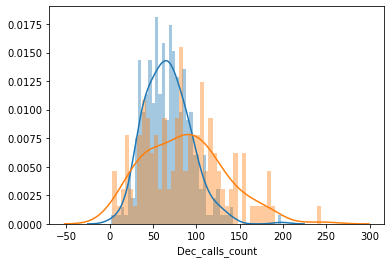

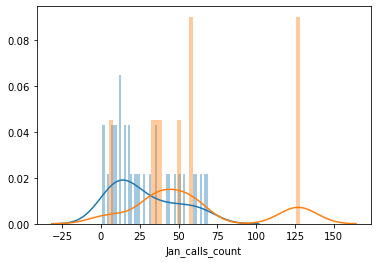

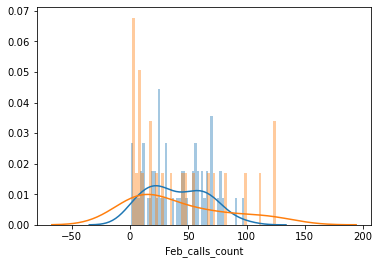

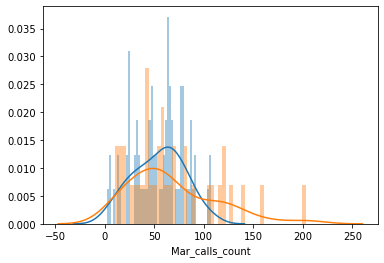

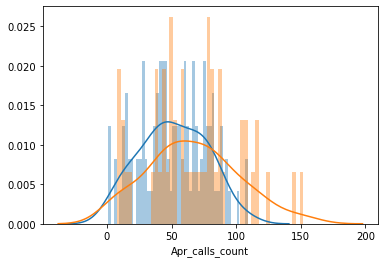

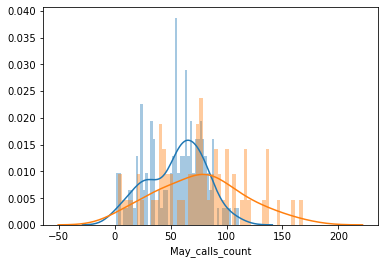

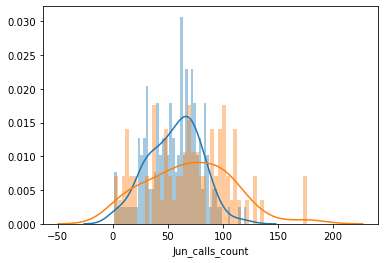

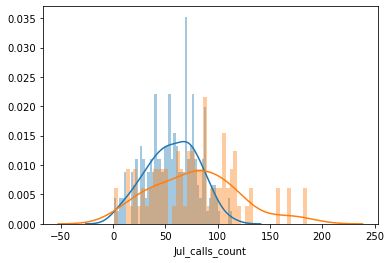

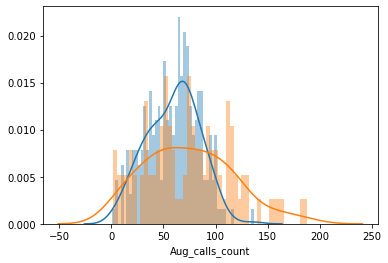

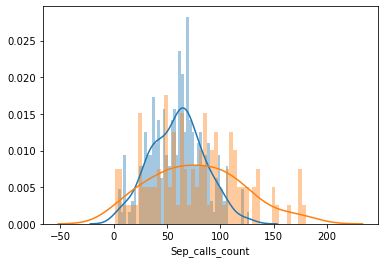

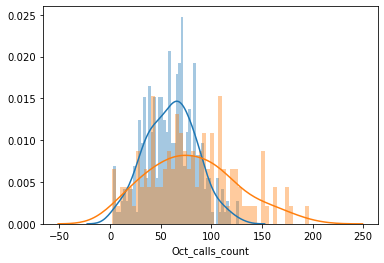

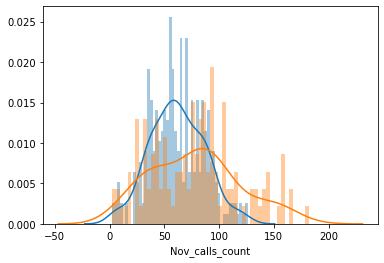

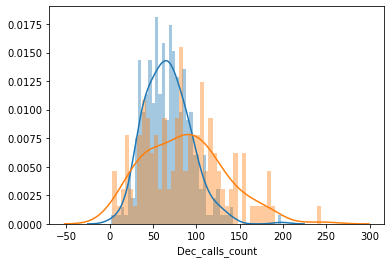

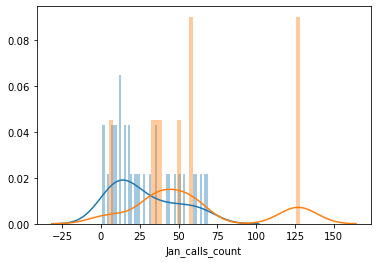

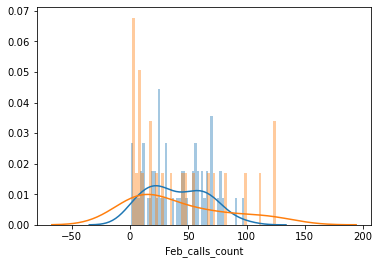

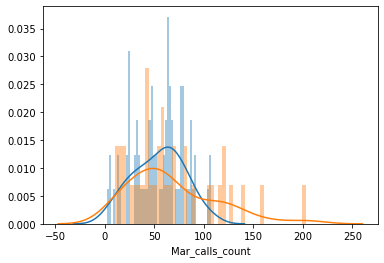

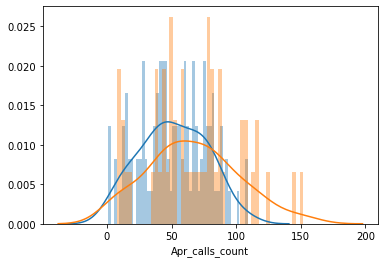

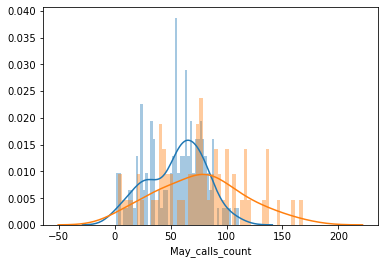

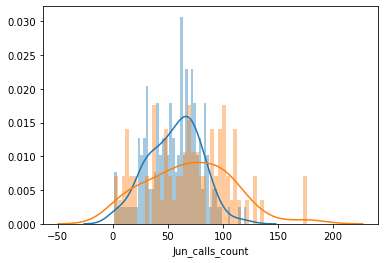

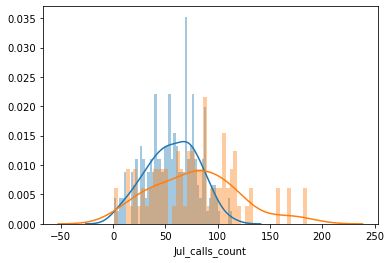

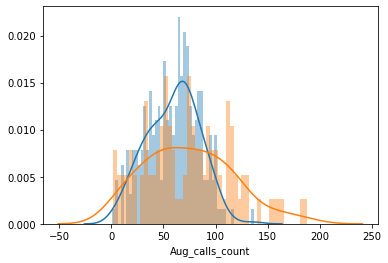

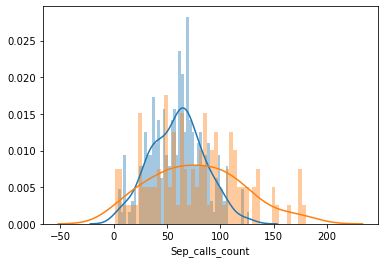

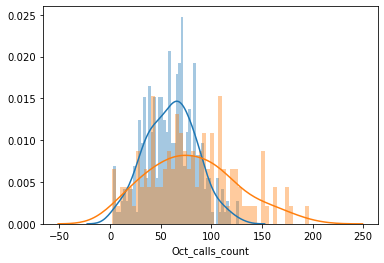

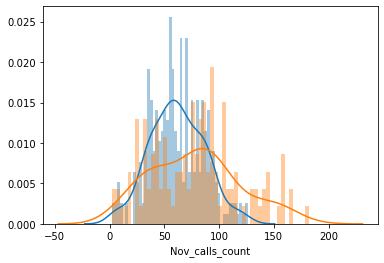

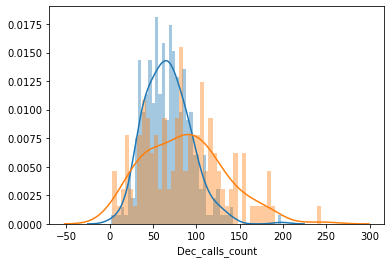

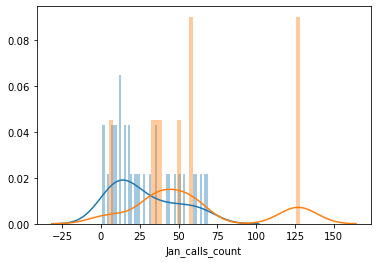

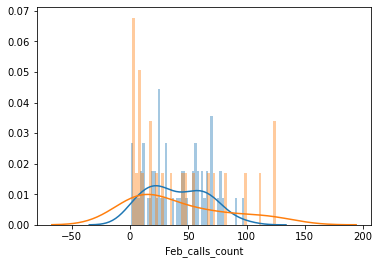

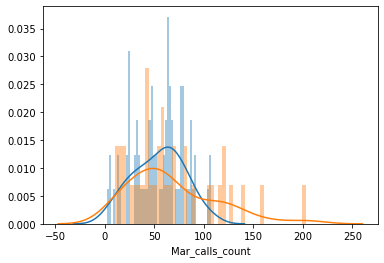

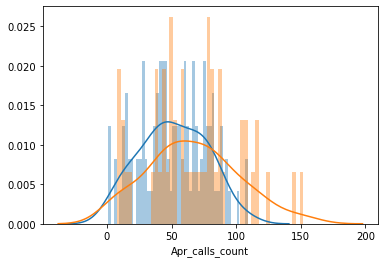

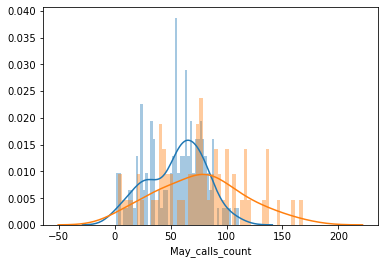

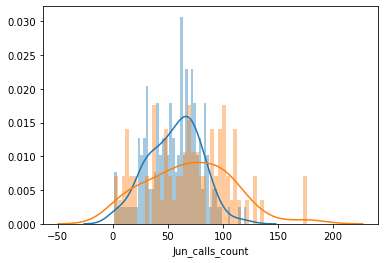

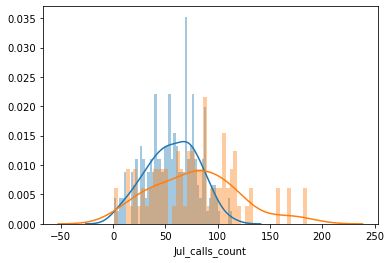

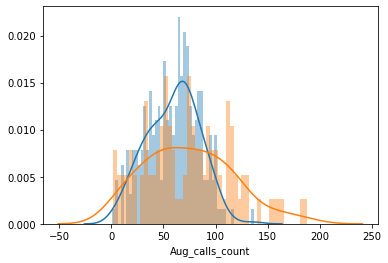

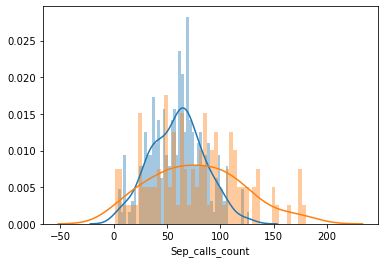

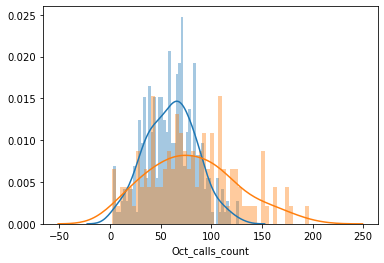

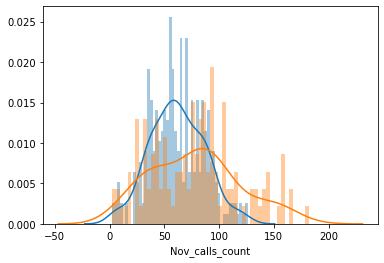

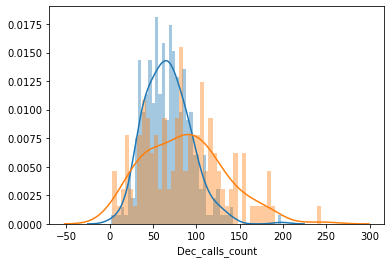

In [16]:
# Функция формирования диаграмм по месяцм
def histogram(mark):
    for m in month:
        sns_plot = sns.distplot(full_smart[m+'_calls_count'], bins=50)
        fig = sns_plot.get_figure()
        sns_plot = sns.distplot(full_ultra[m+'_calls_count'], bins=50)
        fig = sns_plot.get_figure()
        plt.show()
# Вывод диграмм по характеристикам
for i in mark:
    histogram(i)         


## Выводы
1. Большинство гистограмм обладают нормальным распределением. И даже чем-то похожим на симметрию.
2. Разговаривают больше на тарифе "Ультра"
3. Сообщений на тарифе "Ультра" шлют больше в 2 раза
4. Использование интернета также больше на тарифе "Ультра"
5. При этом средние затраты пользователей тарифа Ультра превышают примерно в 2 раза затраты пользователей тарифа 

## 4. Проверка гипотез
1. Средняя выручка тарифов
Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.



In [17]:
# В цикле проверяем гипотезу помесячно
for m in month:
    alpha = 0.05 # критический уровень статистической значимости
    profit_smart = full_smart.loc[:, m+'_profit']
    profit_ultra = full_ultra.loc[:, m+'_profit']
    results = st.ttest_ind(
        profit_smart, 
        profit_ultra) 
    print(m+': p-значение:', results.pvalue) 
    if results.pvalue < alpha: 
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

Jan: p-значение: 0.10808925315773638
Не получилось отвергнуть нулевую гипотезу
Feb: p-значение: 0.0004277728504846423
Отвергаем нулевую гипотезу
Mar: p-значение: 0.00012361053953404317
Отвергаем нулевую гипотезу
Apr: p-значение: 6.526602107723383e-10
Отвергаем нулевую гипотезу
May: p-значение: 2.4867082273073885e-07
Отвергаем нулевую гипотезу
Jun: p-значение: 1.8337412801572542e-11
Отвергаем нулевую гипотезу
Jul: p-значение: 1.8703588297636348e-10
Отвергаем нулевую гипотезу
Aug: p-значение: 1.732806765956262e-10
Отвергаем нулевую гипотезу
Sep: p-значение: 7.312250360921921e-13
Отвергаем нулевую гипотезу
Oct: p-значение: 1.0181268048067042e-09
Отвергаем нулевую гипотезу
Nov: p-значение: 3.91262445483021e-15
Отвергаем нулевую гипотезу
Dec: p-значение: 1.2707539123352949e-06
Отвергаем нулевую гипотезу


### Промежуточный вывод
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается во всех месяцах кроме января

2. Средняя выручка по Москве и регионам
Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


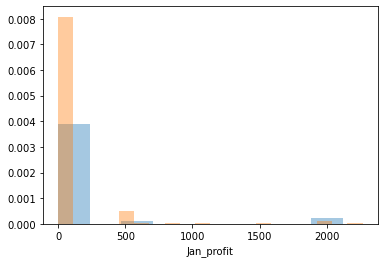

D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


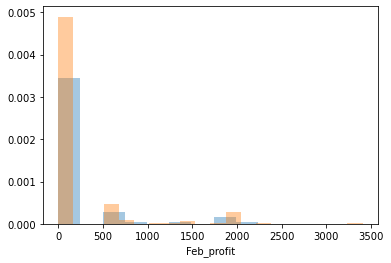

D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


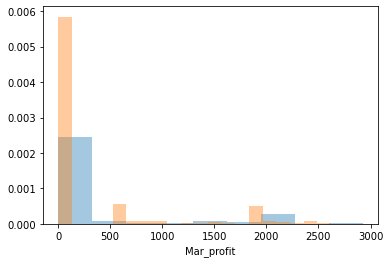

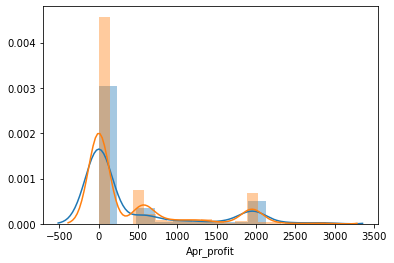

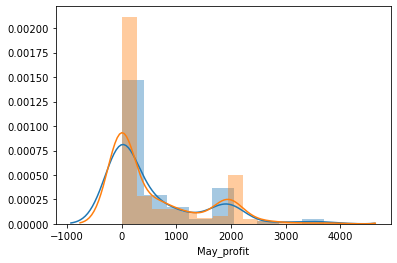

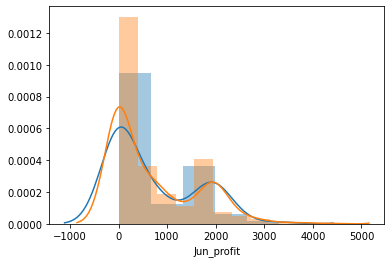

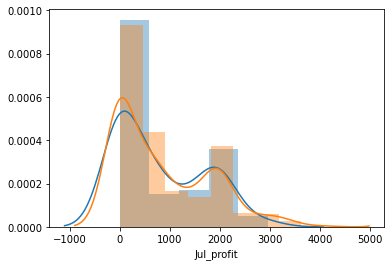

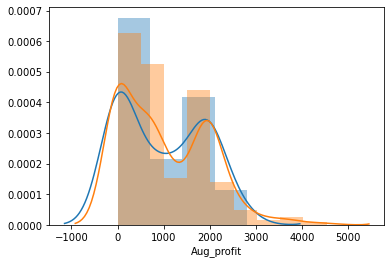

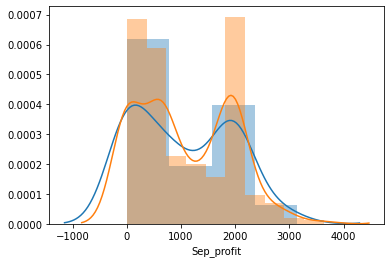

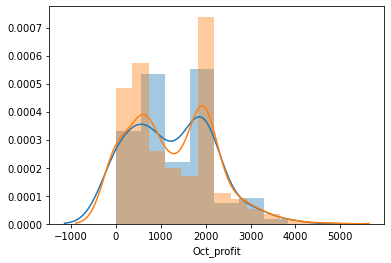

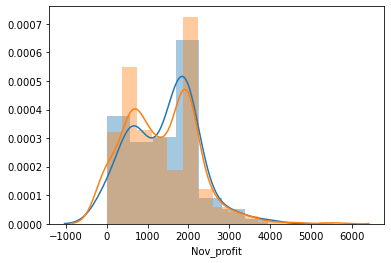

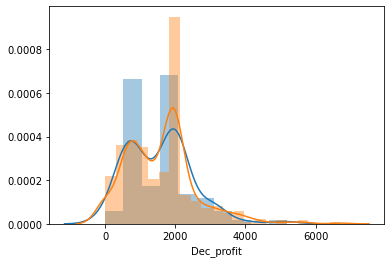

In [18]:
# Гистограмма распределения выручки в Москве и регионах
for m in month:
    sns_plot = sns.distplot(full.query("city == 'Москва'").loc[:, m+'_profit'])
    fig = sns_plot.get_figure()
    sns_plot = sns.distplot(full.query("city != 'Москва'").loc[:, m+'_profit'])
    fig = sns_plot.get_figure()
    plt.show()


In [19]:
# В цикле проверяем гипотезы помесячно
for m in month:
    alpha = 0.05 # критический уровень статистической значимости
    profit_moscow = full.query("city == 'Москва'").loc[:, m+'_profit']
    profit_region = full.query("city != 'Москва'").loc[:, m+'_profit']
    results = st.ttest_ind(
        profit_moscow, 
        profit_region) 
    print(m+': p-значение:', results.pvalue) 
    if results.pvalue < alpha: 
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

Jan: p-значение: 0.2200919681851459
Не получилось отвергнуть нулевую гипотезу
Feb: p-значение: 0.6391465960744123
Не получилось отвергнуть нулевую гипотезу
Mar: p-значение: 0.9611011729328695
Не получилось отвергнуть нулевую гипотезу
Apr: p-значение: 0.9474136521508256
Не получилось отвергнуть нулевую гипотезу
May: p-значение: 0.7623613278093949
Не получилось отвергнуть нулевую гипотезу
Jun: p-значение: 0.9256696849638836
Не получилось отвергнуть нулевую гипотезу
Jul: p-значение: 0.638464217278385
Не получилось отвергнуть нулевую гипотезу
Aug: p-значение: 0.6704044884490138
Не получилось отвергнуть нулевую гипотезу
Sep: p-значение: 0.7687758563200583
Не получилось отвергнуть нулевую гипотезу
Oct: p-значение: 0.7986765107131448
Не получилось отвергнуть нулевую гипотезу
Nov: p-значение: 0.4135821038591727
Не получилось отвергнуть нулевую гипотезу
Dec: p-значение: 0.7118962353639061
Не получилось отвергнуть нулевую гипотезу


### Промежуточный вывод
Ни в одном из месяце не получилось оповергнуть нулевую теорию, а это значит, нельзя сказать, что средняя выручка пользователей между Москвой и регионами не различается

# Общий вывод

<b>Компании более выгоден тариф "Ультра".
Нельзя сказать, что средняя выручка в Москве и регионах отличается.</b>

В процессе работы над проектом были выявлены следующие закономерности:

* Не все пользуются услугами. 8 аботнентов - не звонили, 3 - не пользовались интернетом, 74 - не посылали сообщения
* Большинство гистограмм распределения звонков сообщений и и спользования интернета обладают нормальным распределением.
* Разговаривают больше на тарифе "Ультра"
* Сообщений на тарифе "Ультра" шлют больше в 2 раза
* Использование интернета также больше на тарифе "Ультра"
* При этом средние затраты пользователей тарифа Ультра превышают примерно в 2 раза затраты пользователей тарифа

В процессе проекта все данные были объединены в одну таблицу, на основании которой можно дополнительно исследовать данные в разных разрезах.